In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ast import literal_eval

In [2]:
df_cov = pd.read_csv("../strength_covariance/data_ays/corr_clean_all.csv",index_col=0)
df = pd.read_csv("../data/models_w_props.csv",index_col=0)
top_models = pd.read_csv("../strength_covariance/model_ays/kfold_lr_models.csv",index_col=0)
top_models = top_models.sort_values("rmse_cv_score",ascending=False)
print(df_cov.shape)

(53, 53)


In [3]:
factor_list = []
for line in top_models['factors']:
    factor_list.extend([i for i in literal_eval(line)])
factor_list = list(set(factor_list))
factor_list.sort()

In [4]:
factor_dict = {}
for factor in factor_list: 
    if "lattice_constant" in factor:
        factor_dict[factor] = "lattice constant"
    if "c11" in factor or "c12" in factor or "c44" in factor:
        factor_dict[factor] = "elastic const"
    if "surface_energy" in factor:
        factor_dict[factor] = "surface energy"
    if "cohesive_energy" in factor:
        factor_dict[factor] = "cohesive energy"
    if "stack_fault_energy" in factor or "unstable_twinning" in factor or "unstable_stack" in factor:
        factor_dict[factor] = "stack/twin fault energy"
    if "formation_potential" in factor:
        factor_dict[factor] = "vac. form. energies"
    if "relaxation_volume" in factor:
        factor_dict[factor] = "vac. form. vol."
    if "vacancy_migration_energy" in factor:
        factor_dict[factor] = "vac. migr. energies"
    if "thermal_expansion_coeff" in factor:
        factor_dict[factor] = "thermal exp coeff"
    if "bulk_modulus" in factor:
        factor_dict[factor] = "bulk mod"

In [5]:
factor_table = []
for line in top_models['factors']:
    factor_table.append([factor_dict[i] for i in literal_eval(line)])
df_factors = pd.DataFrame(factor_table)
rmse = abs(top_models['rmse_cv_score']).to_list()

In [6]:
df_factors = df_factors.replace(factor_dict)
factor_list = [factor_dict[i] for i in factor_list]
factor_list = list(set(factor_list))
factor_list.sort()

In [7]:
heatmap_list = []
N_lines = 40
for line in range(N_lines):
    line_tally = []
    current_line = df_factors.iloc[line,:].tolist()
    for col in factor_list:
        if col in current_line:
            line_tally.extend([rmse[line]])
        else:
            line_tally.extend([0])
    heatmap_list.append(line_tally)
df_factor_table = pd.DataFrame(heatmap_list,
                               columns = factor_list)
df_factor_table['model ranking'] = [i+1 for i in range(N_lines)]
df_factor_table = df_factor_table.set_index('model ranking')
df_factor_table = df_factor_table.transpose()

In [8]:
mask = df_factor_table == 0

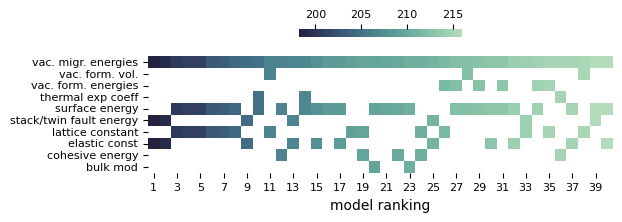

In [9]:
#cmap = sns.color_palette("mako", as_cmap=True)
cmap = sns.cubehelix_palette(start=.2, rot=-.5, light=0.8, as_cmap=True, reverse=True)
fig,ax = plt.subplots(figsize=(6,5))
sns.heatmap(df_factor_table, mask = mask, cmap = cmap, square=True, cbar_kws = dict(shrink= 0.35,location='top'))#,label="RMSE"))
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)
ax.tick_params("both",labelsize=8)
ax.invert_yaxis()
fig.savefig("factor_usage.pdf", bbox_inches = "tight")

In [10]:
factors = df.columns.tolist()
factors = [i for i in factors if ("_fcc" in i) or ("_bcc" in i) or ("_sc" in i) or ("_diamond" in i) or ("_hcp" in i)]

In [11]:
to_remove = ['bcc_fraction','hcp_fraction','thermal_expansion_coeff_bcc', 'thermal_expansion_coeff_diamond', 'surface_energy_100_bcc', 'surface_energy_110_bcc', 'surface_energy_111_bcc', 'surface_energy_121_bcc', 'ideal_surface_energy_100_bcc', 'ideal_surface_energy_110_bcc', 'ideal_surface_energy_111_bcc', 'ideal_surface_energy_121_bcc', 'relaxed_formation_potential_energy_bcc', 'relaxed_formation_potential_energy_diamond', 'relaxed_formation_potential_energy_hcp', 'unrelaxed_formation_potential_energy_bcc', 'unrelaxed_formation_potential_energy_diamond', 'unrelaxed_formation_potential_energy_hcp', 'vacancy_migration_energy_bcc', 'vacancy_migration_energy_diamond', 'vacancy_migration_energy_hcp', 'vacancy_migration_energy_sc', 'relaxation_volume_bcc', 'relaxation_volume_diamond', 'relaxation_volume_hcp']
for i in to_remove:
    if i in df_cov.columns:
        df_cov = df_cov.drop(i,axis=1)
        df_cov = df_cov.drop(i)
df_cov.shape

(38, 38)

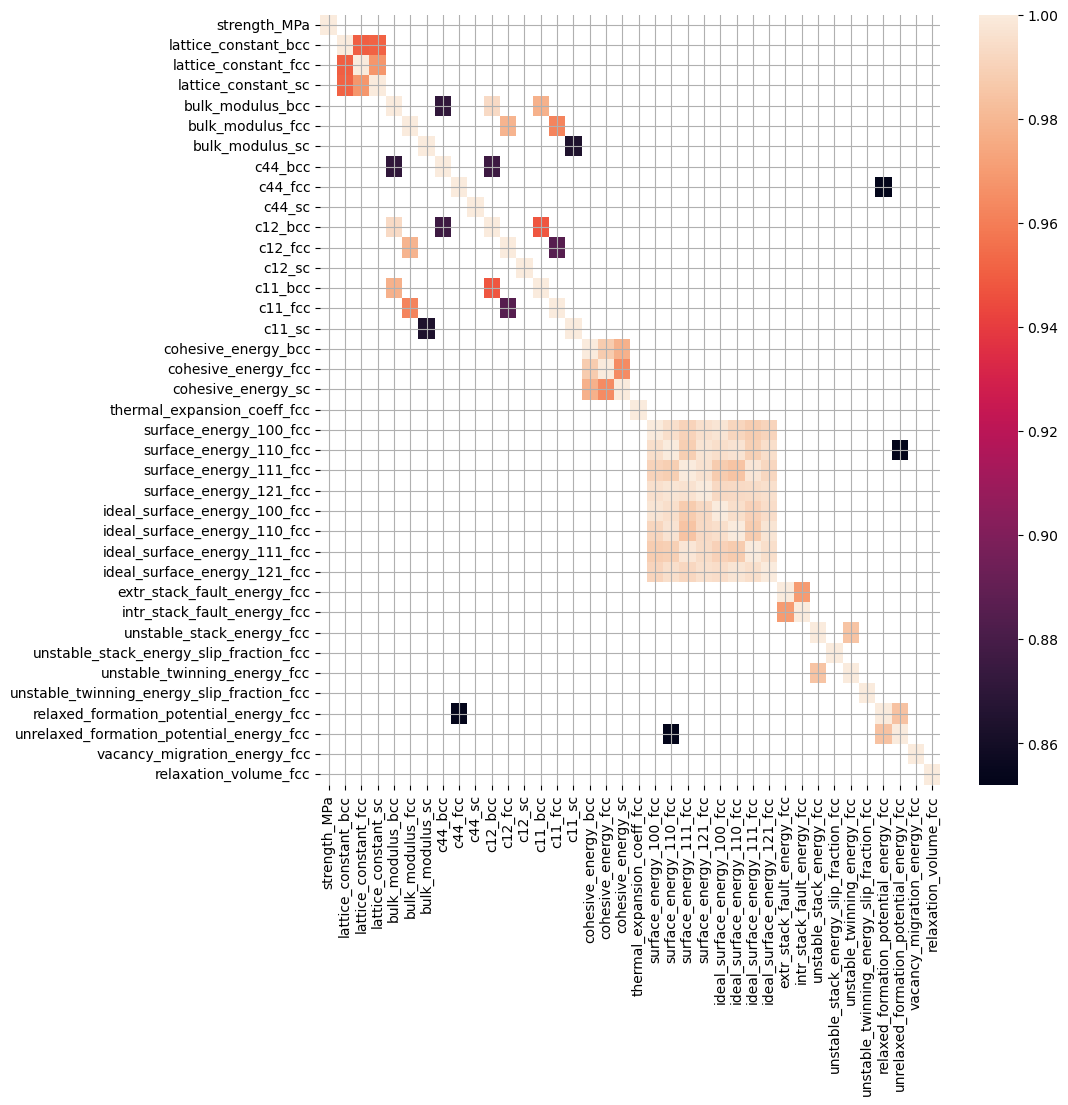

In [12]:
mask = abs(df_cov)<0.85
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_cov,mask = mask)
ax.grid()


In [13]:
top_models_abbr = []
model_count_list = []
for i in top_models['factors'].iloc[0:100]:
    current_list = literal_eval(i)
    updated_list = [factor_dict[j] for j in current_list]
    updated_list.sort()
    top_models_abbr.append(updated_list)
    model_count_list.extend(updated_list)
df_top_models = pd.DataFrame(top_models_abbr)
df_top_models.head()




,0,1,2
0,elastic const,stack/twin fault energy,vac. migr. energies
1,elastic const,stack/twin fault energy,vac. migr. energies
2,lattice constant,surface energy,vac. migr. energies
3,lattice constant,surface energy,vac. migr. energies
4,lattice constant,surface energy,vac. migr. energies


<Axes: xlabel='0'>

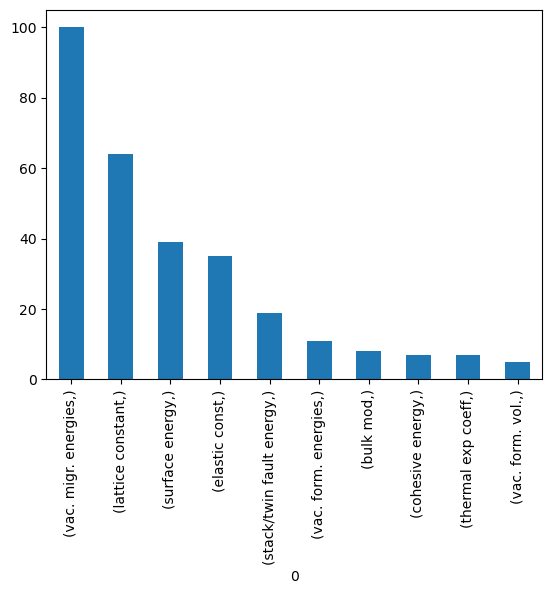

In [14]:
df_model_count = pd.DataFrame(model_count_list)
fig,ax = plt.subplots()
df_model_count.value_counts().plot.bar()

In [15]:
df_top_models.iloc[:20,:]

,0,1,2
0,elastic const,stack/twin fault energy,vac. migr. energies
1,elastic const,stack/twin fault energy,vac. migr. energies
2,lattice constant,surface energy,vac. migr. energies
3,lattice constant,surface energy,vac. migr. energies
4,lattice constant,surface energy,vac. migr. energies
5,lattice constant,surface energy,vac. migr. energies
6,lattice constant,surface energy,vac. migr. energies
7,lattice constant,surface energy,vac. migr. energies
8,elastic const,stack/twin fault energy,vac. migr. energies
9,surface energy,thermal exp coeff,vac. migr. energies
